In [1]:
import pandas as pd

In [2]:
import numpy as np
from sklearn import preprocessing, neighbors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization

Using TensorFlow backend.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import glob

'''# get data file names
path =r'D:\Py scripts\Sad Analysis\Own dataset\Happy'
filenames = glob.glob(path + "/*.csv")
train_happy = pd.DataFrame()
data = []
for filename in filenames:
    df = pd.read_csv(filename)
    sub1 = list(df['eegRawValue'][:7500])
    sub2 = list(df['eegRawValue'][7500:15000])
    sub3 = list(df['eegRawValue'][15000:22500])
    sub4 = list(df['eegRawValue'][22500:30000])
    
    data.append(sub1)
    data.append(sub2)
    data.append(sub3)
    data.append(sub4)
train_happy['eegRawValue'] = data
train_happy['tag'] = 'happy'
'''
# get data file names
path =r'D:\Py scripts\Sad Analysis\Own dataset\Angry'
filenames = glob.glob(path + "/*.csv")
train_angry = pd.DataFrame()
data = []
for filename in filenames:
    df = pd.read_csv(filename)
    sub1 = list(df['eegRawValue'][:7500])
    sub2 = list(df['eegRawValue'][7500:15000])
    sub3 = list(df['eegRawValue'][15000:22500])
    sub4 = list(df['eegRawValue'][22500:30000])
    
    data.append(sub1)
    data.append(sub2)
    data.append(sub3)
    data.append(sub4)
    
train_angry['eegRawValue'] = data
train_angry['tag'] = 'angry'

# get data file names
path =r'D:\Py scripts\Sad Analysis\Own dataset\Relaxed'
filenames = glob.glob(path + "/*.csv")
train_relaxed = pd.DataFrame()
data = []
for filename in filenames:
    df = pd.read_csv(filename)
    sub1 = list(df['eegRawValue'][:7500])
    sub2 = list(df['eegRawValue'][7500:15000])
    sub3 = list(df['eegRawValue'][15000:22500])
    sub4 = list(df['eegRawValue'][22500:30000])
    
    data.append(sub1)
    data.append(sub2)
    data.append(sub3)
    data.append(sub4)
    
train_relaxed['eegRawValue'] = data
train_relaxed['tag'] = 'relaxed'

In [5]:
#train_happy['len_of_raw_eeg'] = train_happy.eegRawValue.apply(lambda x: len(x))
train_angry['len_of_raw_eeg'] = train_angry.eegRawValue.apply(lambda x: len(x))
train_relaxed['len_of_raw_eeg'] = train_relaxed.eegRawValue.apply(lambda x: len(x))

In [6]:
#train_happy = train_happy.query('len_of_raw_eeg == 7500').reset_index(drop=True)
train_relaxed = train_relaxed.query('len_of_raw_eeg == 7500').reset_index(drop=True)
train_angry = train_angry.query('len_of_raw_eeg == 7500').reset_index(drop=True)

In [7]:
#train = pd.concat([train_angry, train_happy, train_relaxed]).reset_index(drop=True)
train = pd.concat([train_angry,train_relaxed]).reset_index(drop=True)

In [9]:
train.shape

(49, 3)

In [10]:
train.tag.value_counts()

relaxed    29
angry      20
Name: tag, dtype: int64

In [11]:
def replace(tag):
    if tag == 'angry':
        return 1
    if tag == 'happy':
        return 2
    if tag == 'relaxed':
        return 0
    # Relaxed -> 0

train['tag'] = train.tag.apply(replace)

In [12]:
import numpy as np
X = np.array(list(train.eegRawValue))
Y = train.tag.values
#Y = pd.get_dummies(Y)

In [13]:
X = X.reshape(49,7500,1)

In [14]:
X.shape

(49, 7500, 1)

In [15]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size = 0.20)

In [17]:
from keras.layers import Dense, Dropout, Flatten, Embedding, LSTM
from keras.layers import Conv1D, MaxPooling1D

In [39]:
model = Sequential()
model.add(LSTM(32, dropout_U = 0.1, dropout_W = 0.1))
model.add(Dense(500,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
#print(model.summary())


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, dropout=0.1, recurrent_dropout=0.1)`
  after removing the cwd from sys.path.


In [41]:
#Fitting the NN model
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
history = model.fit(X_train, y_train, epochs= 15, shuffle = True, callbacks=[es], 
                     validation_data=[X_test,y_test])

Train on 39 samples, validate on 10 samples
Epoch 1/15
39/39 [==============================] - 28s 727ms/step - loss: 2.3521 - acc: 0.5897 - val_loss: 0.6338 - val_acc: 0.6000
Epoch 2/15
39/39 [==============================] - 26s 671ms/step - loss: 0.6245 - acc: 0.6410 - val_loss: 0.6030 - val_acc: 0.9000
Epoch 3/15
39/39 [==============================] - 25s 653ms/step - loss: 0.6706 - acc: 0.5897 - val_loss: 0.5799 - val_acc: 0.7000
Epoch 4/15
39/39 [==============================] - 26s 679ms/step - loss: 0.8124 - acc: 0.4615 - val_loss: 0.5203 - val_acc: 0.9000
Epoch 5/15
39/39 [==============================] - 27s 705ms/step - loss: 0.8479 - acc: 0.5128 - val_loss: 0.4857 - val_acc: 0.9000
Epoch 6/15
39/39 [==============================] - 27s 684ms/step - loss: 0.6178 - acc: 0.7179 - val_loss: 0.4762 - val_acc: 0.8000
Epoch 7/15
39/39 [==============================] - 26s 659ms/step - loss: 0.6892 - acc: 0.6154 - val_loss: 0.4777 - val_acc: 0.8000
Epoch 8/15
39/39 [=======

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_29 (Dense)             (None, 500)               16500     
_________________________________________________________________
dense_30 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_31 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 141,253
Trainable params: 141,253
Non-trainable params: 0
_________________________________________________________________


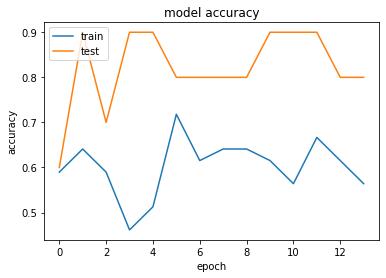

In [43]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

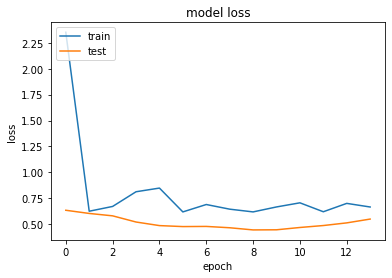

In [44]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
Y_p = model.predict_classes(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test, Y_p))
print('F1 score:', f1_score(y_test, Y_p,average='weighted'))
print('Recall:', recall_score(y_test, Y_p, average='weighted'))
print('Precision_score:', precision_score(y_test, Y_p, average='weighted'))

Accuracy: 0.8
F1 score: 0.7809523809523808
Recall: 0.8
Precision_score: 0.85


In [47]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [50]:
Y_p

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])